In [1]:
from bs4 import BeautifulSoup
import requests
import re
import datetime
import pandas as pd

In [2]:
review_url = "https://www.google.com/search?gs_ssp=eJzj4tVP1zc0zIg3MinLM6gyYLRSNagwNkxJNLRMTbKwtEhOMUxMsjKoME01MDQ2sUxNNE8yMEpKNfbiTslPVsgsSczJTMwDAIEAE7U&q=doc+italian&oq=doc+&aqs=chrome.3.69i59j69i57j69i59j46i39i175i199j69i60j69i65l3.6211j1j4&sourceid=chrome&ie=UTF-8#lrd=0x31da19eb898cd1ab:0x5e01349ea7b02be3,1,,,"

page = requests.get(review_url)
soup = BeautifulSoup(page.content, 'html.parser')

<!DOCTYPE doctype html>
<html lang="en-SG"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>doc italian - Google Search</title><script nonce="2MJNIK8iUq+Vaw5sL75Z/w==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=w
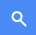
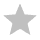
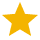
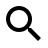
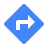

In [3]:
soup

In [4]:
classes = [value 
           for element in soup.find_all(class_=True) 
           for value in element["class"]]

classes

['cOl4Id',
 'V6gwVd',
 'iWkuvd',
 'cDrQ7',
 'V6gwVd',
 'ntlR9',
 'iWkuvd',
 'tJ3Myc',
 'bz1lBb',
 'Pg70bf',
 'l',
 'V6gwVd',
 'iWkuvd',
 'cDrQ7',
 'V6gwVd',
 'ntlR9',
 'iWkuvd',
 'tJ3Myc',
 'H0PQec',
 'sbc',
 'esbc',
 'noHIxc',
 'x',
 'sc',
 'KP7LCb',
 'bRsWnc',
 'N6RWV',
 'Pg70bf',
 'Uv67qb',
 'OXXup',
 'eZt8xd',
 'eZt8xd',
 'eZt8xd',
 'FElbsf',
 'Pg70bf',
 'wEsjbd',
 'ZINbbc',
 'xpd',
 'O9g5cc',
 'uUPGi',
 'Xj2aue',
 'coPU8c',
 'RnNGze',
 'PA9J5',
 'RXaOfd',
 'TWMOUc',
 'OmTIzf',
 'sa1toc',
 'ozatM',
 'yNFsl',
 'SkUj4c',
 'yNFsl',
 'yNFsl',
 'yNFsl',
 'yNFsl',
 'yNFsl',
 'PA9J5',
 'RXaOfd',
 'TWMOUc',
 'OmTIzf',
 'sa1toc',
 'ozatM',
 'yNFsl',
 'SkUj4c',
 'yNFsl',
 'ZINbbc',
 'xpd',
 'O9g5cc',
 'uUPGi',
 'kCrYT',
 'nGphre',
 'UykT9d',
 'zBAuLc',
 'BNeawe',
 'deIvCb',
 'AP7Wnd',
 'BNeawe',
 'tAd8D',
 'AP7Wnd',
 'r0bn4c',
 'rQMQod',
 'tP9Zud',
 'Eq0J8',
 'oqSTJd',
 'Hk2yDb',
 'KsR1A',
 'Eq0J8',
 'nYT7Qb',
 'Q0HXG',
 'kCrYT',
 'skVgpb',
 'VGHMXd',
 'LpaDrb',
 'S7Jdze',
 'EYOsld',
 'BNeaw

In [10]:
review_table = soup.find(class_="VGHMXd")

In [36]:
review_table.get('href')

'https://maps.google.com/maps?um=1&ie=UTF-8&fb=1&gl=sg&sa=X&geocode=KavRjInrGdoxMeMrsKeeNAFe&daddr=21+Tg+Pagar+Rd,+%2301-01+d.o.c,+Singapore+088444&ved=2ahUKEwjTwpPehPbyAhVezDgGHeaoDcYQlDt6BAgLEAM'

In [84]:
address = review_table.get('href').split('&')[6].split('=')[1].replace('+',' ').replace('%23','#')

In [85]:
address

'21 Tg Pagar Rd, #01-01 d.o.c, Singapore 088444'

In [94]:
name = soup.find(class_="zBAuLc").get_text()
name

'd.o.c'

In [122]:
rating = soup.find_all('span', {'class' : 'Eq0J8'})[0].get_text()
rating

'4.5'

In [128]:
numReviews = int(re.search(r'\d+', soup.find_all('span', {'class' : 'Eq0J8'})[1].get_text()).group())
numReviews

415

'4.5'